In [13]:
import dlib
from skimage import io
import cv2
import numpy as np

In [14]:
def show_img(img):
    plt.imshow(img)
    plt.show()

In [20]:
image_file = '../../traffic-signs-dataset/diff_size/frame0000.jpg'
img = io.imread(image_file)

# Locations of candidate objects will be saved into rects
rects = []
dlib.full_object_detections(img, rects)

print("number of rectangles found {}".format(len(rects))) 
for k, d in enumerate(rects):
    print("Detection {}: Left: {} Top: {} Right: {} Bottom: {}".format(
        k, d.left(), d.top(), d.right(), d.bottom()))

ArgumentError: Python argument types in
    full_object_detections.__init__(full_object_detections, numpy.ndarray, list)
did not match C++ signature:
    __init__(_object*)

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt

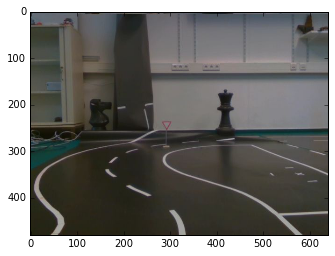

In [9]:
plt.imshow(img)

In [10]:
def find_red(img):
    img_hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)

    # lower mask (0-10)
    lower_red = np.array([0,50,50])
    upper_red = np.array([10,255,255])
    mask0 = cv2.inRange(img_hsv, lower_red, upper_red)

    # upper mask (170-180)
    lower_red = np.array([160,50,50])
    upper_red = np.array([180,255,255])
    mask1 = cv2.inRange(img_hsv, lower_red, upper_red)

    # join my masks
    mask = mask0+mask1

    output_img = img.copy()
    output_img[np.where(mask==0)] = 0
    output_img[np.where(mask!=0)] = 255

    return output_img

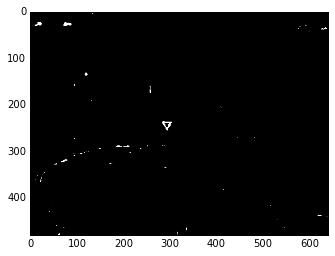

In [16]:
oimg = find_red(img)
show_img(oimg)

In [17]:
image_file = '../../traffic-signs-dataset/diff_size/frame0000.jpg'
img = io.imread(image_file)

# Locations of candidate objects will be saved into rects
rects = []
dlib.find_candidate_object_locations(oimg, rects, min_size=500)

print("number of rectangles found {}".format(len(rects))) 
for k, d in enumerate(rects):
    print("Detection {}: Left: {} Top: {} Right: {} Bottom: {}".format(
        k, d.left(), d.top(), d.right(), d.bottom()))

number of rectangles found 1
Detection 0: Left: 0 Top: 0 Right: 639 Bottom: 479
